In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np

# Analysis

(array([ 247.,  318.,  282.,  275.,  266.,  278.,  292.,  241.,  200.,
         206.,  187.,  184.,  168.,  179.,  215.,  239.,  271.,  392.,
         350.,  393.,  466.,  487.,  556.,  632.,  752.,  859., 1092.,
        1116., 1276., 1378., 1661., 1571., 1829., 1675., 1614., 1654.,
        1395., 1042.,  730.,  515.,  326.,  154.,   63.,   37.,   18.,
          10.,    5.,    9.,    3.,    3.]),
 array([  52.8  ,   80.004,  107.208,  134.412,  161.616,  188.82 ,
         216.024,  243.228,  270.432,  297.636,  324.84 ,  352.044,
         379.248,  406.452,  433.656,  460.86 ,  488.064,  515.268,
         542.472,  569.676,  596.88 ,  624.084,  651.288,  678.492,
         705.696,  732.9  ,  760.104,  787.308,  814.512,  841.716,
         868.92 ,  896.124,  923.328,  950.532,  977.736, 1004.94 ,
        1032.144, 1059.348, 1086.552, 1113.756, 1140.96 , 1168.164,
        1195.368, 1222.572, 1249.776, 1276.98 , 1304.184, 1331.388,
        1358.592, 1385.796, 1413.   ]),
 <BarContainer o

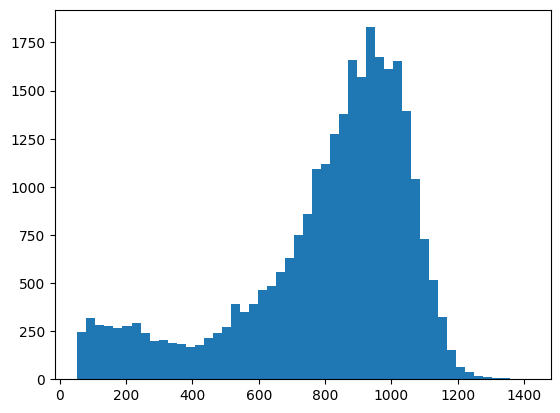

In [55]:
plt.hist(np.loadtxt('../data/interim/S1AvsAAPF_20June2025/values.txt'), bins=50)

(array([ 462.,  553.,  384.,  320.,  428.,  381.,  350.,  269.,  262.,
         220.,  205.,  224.,  209.,  206.,  185.,  226.,  244.,  266.,
         269.,  287.,  280.,  315.,  300.,  303.,  312.,  314.,  357.,
         444.,  492.,  535.,  649.,  713.,  797.,  919., 1084.,  980.,
        1016., 1003.,  919.,  766.,  677.,  541.,  349.,  225.,  131.,
          85.,   47.,   26.,   12.,   16.]),
 array([  52.8  ,   78.864,  104.928,  130.992,  157.056,  183.12 ,
         209.184,  235.248,  261.312,  287.376,  313.44 ,  339.504,
         365.568,  391.632,  417.696,  443.76 ,  469.824,  495.888,
         521.952,  548.016,  574.08 ,  600.144,  626.208,  652.272,
         678.336,  704.4  ,  730.464,  756.528,  782.592,  808.656,
         834.72 ,  860.784,  886.848,  912.912,  938.976,  965.04 ,
         991.104, 1017.168, 1043.232, 1069.296, 1095.36 , 1121.424,
        1147.488, 1173.552, 1199.616, 1225.68 , 1251.744, 1277.808,
        1303.872, 1329.936, 1356.   ]),
 <BarContainer o

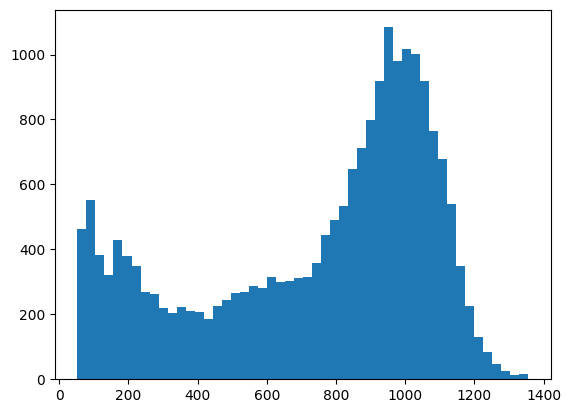

In [56]:
plt.hist(np.loadtxt('../data/interim/S1AvsAAPF_20June2025/values.txt'), bins=50)

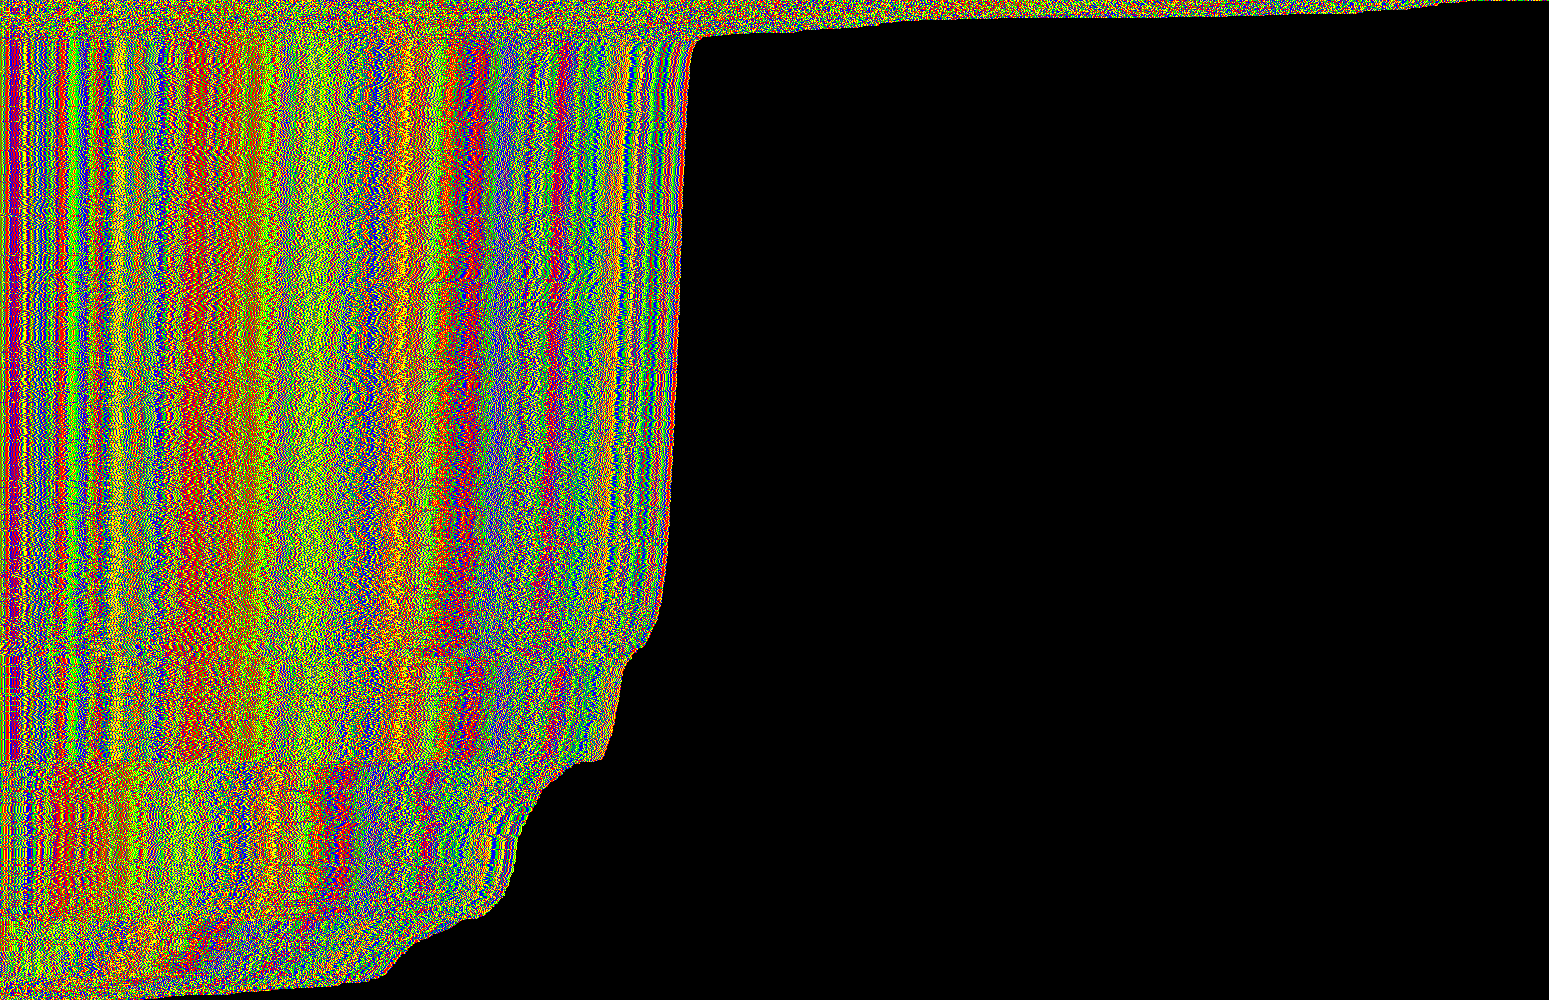

In [33]:
from Bio import SeqIO
import numpy as np
from PIL import Image

# Define colors for nucleotides
colors = {'A': (255, 0, 0),   # Red
          'T': (0, 255, 0),   # Green
          'G': (0, 0, 255),   # Blue
          'C': (255, 255, 0), # Yellow
          '-': (0, 0, 0)}     # Black

# Load sequences
sequences = [str(rec.seq) for rec in SeqIO.parse("../data/interim/S1AvsAAPF_20June2025/example.fasta", "fasta")]

# Sort sequences by length (longest first)
sequences.sort(key=len, reverse=True)

max_len = max(len(seq) for seq in sequences)

# Create image array
img_array = np.zeros((len(sequences), max_len, 3), dtype=np.uint8)
for i, seq in enumerate(sequences):
    for j, nt in enumerate(seq):
        img_array[i, j] = colors.get(nt.upper(), (128,128,128))  # gray for unknowns

# Save as image
img = Image.fromarray(img_array)
img
#img.save("alignment_sorted.png")

(array([  5.,   2.,   4.,   2.,   9.,  39.,  20.,  82.,  67.,  37., 124.,
        572.,   4.,   2.,   3.,   6.,   2.,   1.,   1.,   0.,   0.,   1.,
          0.,   2.,   1.,   1.,   4.,   6.,   2.,   1.]),
 array([ 144.        ,  190.83333333,  237.66666667,  284.5       ,
         331.33333333,  378.16666667,  425.        ,  471.83333333,
         518.66666667,  565.5       ,  612.33333333,  659.16666667,
         706.        ,  752.83333333,  799.66666667,  846.5       ,
         893.33333333,  940.16666667,  987.        , 1033.83333333,
        1080.66666667, 1127.5       , 1174.33333333, 1221.16666667,
        1268.        , 1314.83333333, 1361.66666667, 1408.5       ,
        1455.33333333, 1502.16666667, 1549.        ]),
 <BarContainer object of 30 artists>)

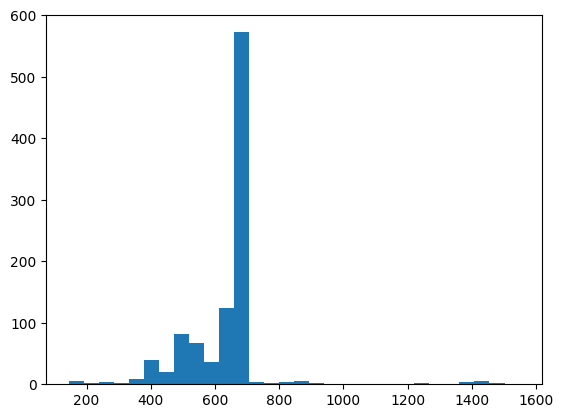

In [40]:
plt.hist([len(s) for s in sequences], bins=30)

In [132]:
folder = '../data/interim/S1AvsAAPF_20June2025/'

In [133]:
seq_lens = []
for record in SeqIO.parse(folder + 'reads.fasta', 'fasta'):
    seq_lens.append(len(record.seq))

In [134]:
len(seq_lens)

104319

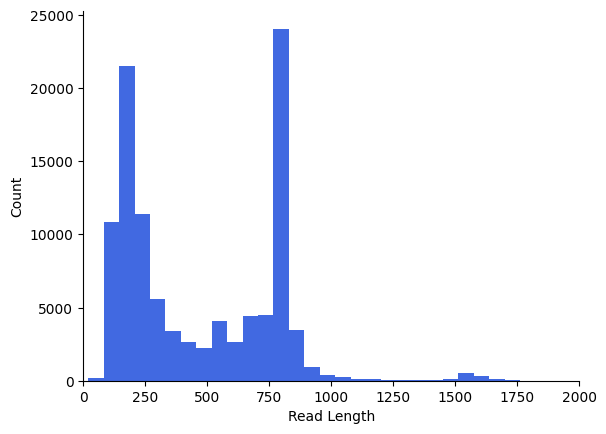

In [135]:
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(seq_lens, bins=50, facecolor='royalblue')
plt.xlim([0, 2000])
plt.xlabel('Read Length')
plt.ylabel('Count')

plt.show()

In [136]:
counts_in = pd.read_csv(folder + 'input_counts_blast.txt', sep='\t', header=None)
counts_out = pd.read_csv(folder + 'output_counts_blast.txt', sep='\t', header=None)

counts_in.columns = ['seq_id', 'read_count']
counts_out.columns = ['seq_id', 'read_count']

#counts_in = counts_in.query('read_count > 100')
#counts_out = counts_out.query('read_count > 100')

In [137]:
counts_in.read_count.sum()

np.int64(20557)

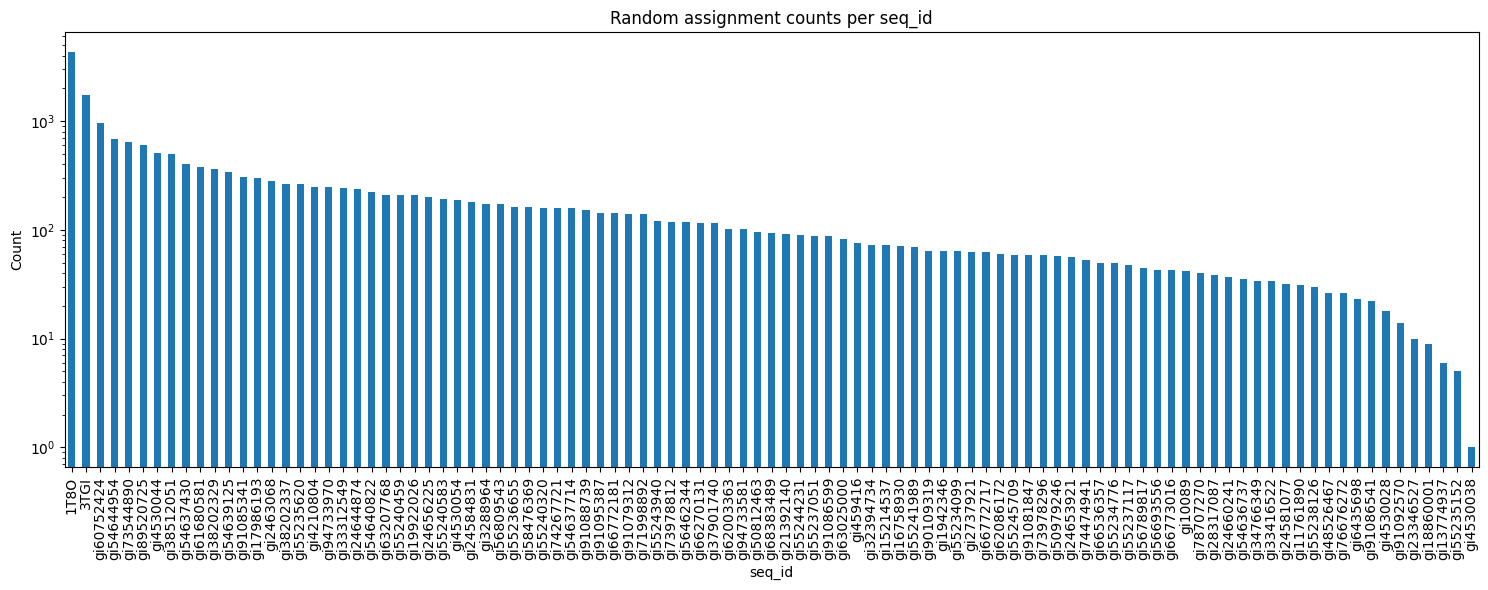

In [140]:
d = counts_in.seq_id.to_dict()
s = counts_in.read_count.cumsum().values
random_indices = np.random.randint(0,20557,20557)
bin_indices = np.searchsorted(s, random_indices, side='right')
counts = pd.Series([d[i] for i in bin_indices]).value_counts()
plt.figure(figsize=(15,6))
counts.plot(kind="bar")
plt.xlabel("seq_id")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Random assignment counts per seq_id")
plt.yscale('log')
plt.tight_layout()
plt.show()

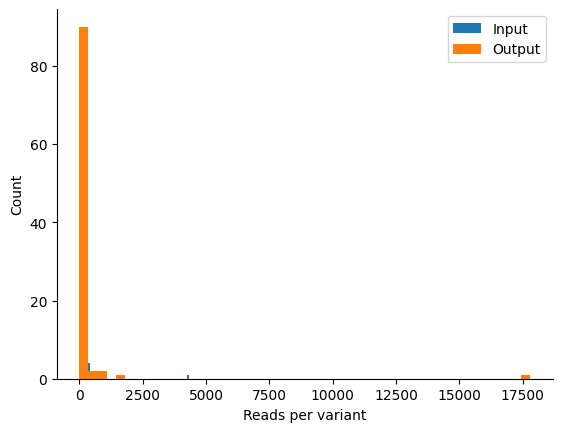

In [16]:
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(counts_in.read_count, bins=50, label='Input')
plt.hist(counts_out.read_count, bins=50, label='Output')
plt.xlabel('Reads per variant')
plt.ylabel('Count')

plt.legend()

plt.show()

In [17]:
counts_in.read_count.sum() + counts_out.read_count.sum()

np.int64(48668)

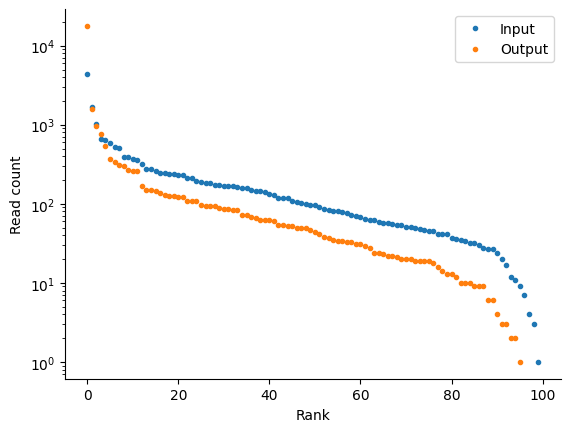

In [18]:
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(counts_in.read_count.sort_values(ascending=False), '.', label='Input')
plt.plot(counts_out.read_count.sort_values(ascending=False), '.', label='Output')

plt.yscale('log')

plt.xlabel('Rank')
plt.ylabel('Read count')

plt.legend()

plt.show()

In [19]:
def bootstrap_enrichment_single_counts(input_counts, output_counts, B=1000, pseudocount=1):
    input_counts = np.array(input_counts)
    output_counts = np.array(output_counts)

    # Normalize to get probabilities
    input_total = input_counts.sum()
    output_total = output_counts.sum()

    input_freqs = input_counts / input_total
    output_freqs = output_counts / output_total

    n_variants = len(input_counts)
    enrichments = np.zeros(n_variants)
    errors = np.zeros(n_variants)

    boot_matrix = []

    for _ in range(B):
        input_boot = np.random.multinomial(input_total, input_freqs)
        output_boot = np.random.multinomial(output_total, output_freqs)

        enrichment_boot = np.log((output_boot + pseudocount) / (input_boot + pseudocount))
        boot_matrix.append(enrichment_boot)

    boot_matrix = np.stack(boot_matrix)  # shape: (B, n_variants)

    enrichments = boot_matrix.mean(axis=0)
    errors = boot_matrix.std(axis=0, ddof=1)

    return enrichments, errors


In [20]:
df_merge = counts_in.merge(counts_out, on='seq_id', how='outer').fillna(0).set_index('seq_id')

In [21]:
df_merge['enrichment_means'], df_merge['enrichment_stds'] = bootstrap_enrichment_single_counts(df_merge.read_count_x, df_merge.read_count_y)

In [22]:
df_merge = df_merge.sort_values(by='enrichment_means', ascending=False)

In [23]:
df_merge.head(10)

,read_count_x,read_count_y,enrichment_means,enrichment_stds
seq_id,,,,
gi33312549,233,1585.0,1.918748,0.069340
gi91092570,12,84.0,1.896002,0.303165
gi91081847,63,312.0,1.588998,0.131827
1T8O,4332,17806.0,1.413840,0.013641
gi4530028,24,97.0,1.357875,0.216025
gi34766349,32,127.0,1.352320,0.195664
gi10089,51,149.0,1.065465,0.163883
gi55241989,85,166.0,0.665058,0.133065
gi4530044,508,962.0,0.636533,0.053332


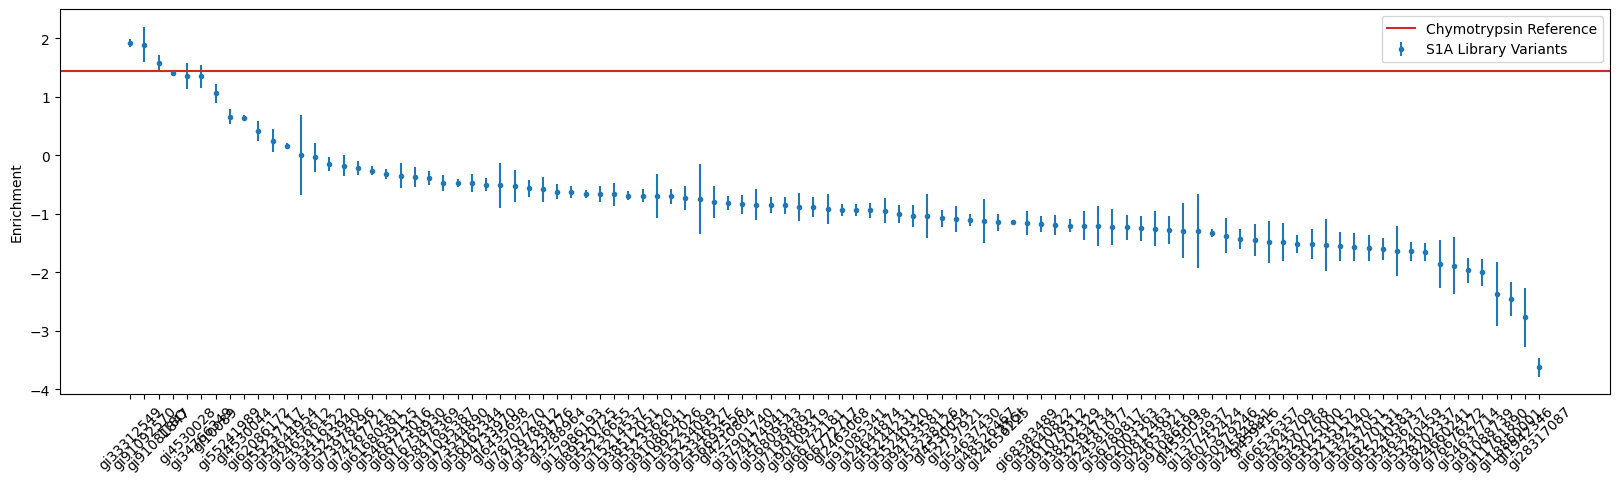

In [24]:
fig = plt.figure(figsize=(20, 5))
plt.errorbar(df_merge.index, df_merge.enrichment_means, df_merge.enrichment_stds, fmt='.', label='S1A Library Variants')
plt.xticks(rotation=45)
plt.ylabel('Enrichment')
plt.axhline(1.447372, color='tab:red', label='Chymotrypsin Reference')
plt.legend()
plt.show()

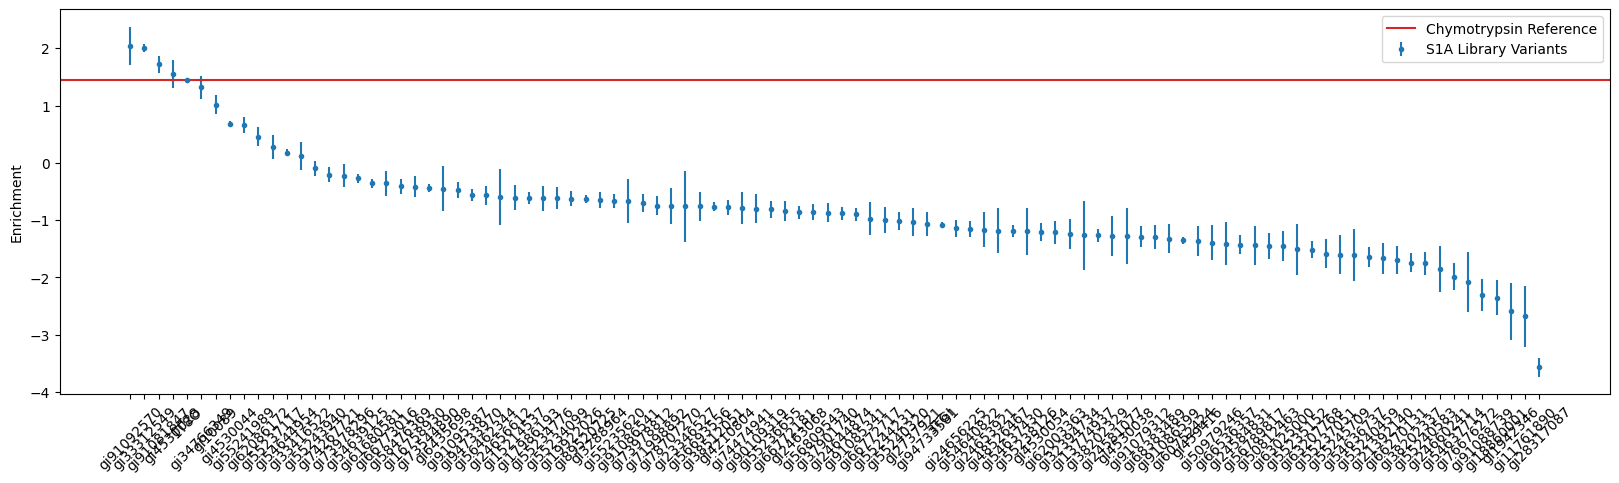

In [18]:
fig = plt.figure(figsize=(20, 5))
plt.errorbar(df_merge.index, df_merge.enrichment_means, df_merge.enrichment_stds, fmt='.', label='S1A Library Variants')
plt.xticks(rotation=45)
plt.ylabel('Enrichment')
plt.axhline(1.447372, color='tab:red', label='Chymotrypsin Reference')
plt.legend()
plt.show()